In [1]:
#Start with library imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy
from scipy import stats

In [2]:
#Import data
data_set = "/Users/jackmoody/Desktop/JHU_Summer_2022/625.725/625.725_Project/nhanes_2015_2016.csv"
df = pd.read_csv(data_set)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# 1. Exploratory Data Analysis Phase

## Data Frame Basics
Now lets get some basic understanding of our dataset, no descriptive stats yet, just getting context into the data

In [3]:
df.head() #see just the first 5 rows of data

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
df #see full dataframe, allows us to check the full data set is there and wasn't misloaded
    # shoudl be 5735 rows by 28 columns 

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [5]:
df.columns #get each column name, important for knowning names to call data from

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [6]:
df.dtypes #get each column type, important for data manipulation

SEQN          int64
ALQ101      float64
ALQ110      float64
ALQ130      float64
SMQ020        int64
RIAGENDR      int64
RIDAGEYR      int64
RIDRETH1      int64
DMDCITZN    float64
DMDEDUC2    float64
DMDMARTL    float64
DMDHHSIZ      int64
WTINT2YR    float64
SDMVPSU       int64
SDMVSTRA      int64
INDFMPIR    float64
BPXSY1      float64
BPXDI1      float64
BPXSY2      float64
BPXDI2      float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
BMXLEG      float64
BMXARML     float64
BMXARMC     float64
BMXWAIST    float64
HIQ210      float64
dtype: object

### Data Refining
While all of this data is good to have, not all of it will actually be relevant to my analysis for the project. So I will keep just these columns:
- SEQN = Respondent sequence number 
- SMQ020 = Smoking
- RIAGENDR = Gender
- RIDAGEYR = Age (years)
- DMDEDUC2 = Education level
- BMXWT = Weight (kg)
- BMXHT = Height (cm)
- BMXBMI = BMI
- BPXSY1 = Blood Pressure Systolic (1st rdg)
- BPXSY2 = Blood Pressure Systolic (2nd rdg)

In [7]:
# Isolate the columns of interest 
df_refined = df.loc[:,('SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI', 'BPXSY1', 'BPXSY2')]
df_refined.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI,BPXSY1,BPXSY2
0,83732,1,1,62,5.0,94.8,184.5,27.8,128.0,124.0
1,83733,1,1,53,3.0,90.4,171.4,30.8,146.0,140.0
2,83734,1,1,78,3.0,83.4,170.1,28.8,138.0,132.0
3,83735,2,2,56,5.0,109.8,160.9,42.4,132.0,134.0
4,83736,2,2,42,4.0,55.2,164.9,20.3,100.0,114.0


In [8]:
df_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
 8   BPXSY1    5401 non-null   float64
 9   BPXSY2    5535 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 448.2 KB


### Human Readability
I will now change the names of the columns from the original column name to what they equate to in order to have more human readability

In [9]:
# Change the column names to make it human readable
df_refined.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi', 'bp1', 'bp2']

In [10]:
df_refined.head()

,seqn,smoking,gender,age,education,weight,height,bmi,bp1,bp2
0,83732,1,1,62,5.0,94.8,184.5,27.8,128.0,124.0
1,83733,1,1,53,3.0,90.4,171.4,30.8,146.0,140.0
2,83734,1,1,78,3.0,83.4,170.1,28.8,138.0,132.0
3,83735,2,2,56,5.0,109.8,160.9,42.4,132.0,134.0
4,83736,2,2,42,4.0,55.2,164.9,20.3,100.0,114.0


In [11]:
#Now double check our dataframe shape to ensure we capture everything we want/need and didn't lose any data.
#Should be (5735,10)
df_refined.shape

(5735, 10)

### Think about what type of data we have in this dataframe
We have both categorical and numerical data in this dataframe:
- Categorical
    - smoking
    - gender
    - education
- Numerical
    - age
    - weight
    - height
    - bmi
    - bp 1
    - bp 2

### Data cleaning
we now need to check for:
1. duplicated or unneccesary data
2. Null values or missing data
3. Outliers in the data

In [12]:
# Check for duplicates
duplicateRowsDF = df_refined[df_refined.duplicated()]
duplicateRowsDF

,seqn,smoking,gender,age,education,weight,height,bmi,bp1,bp2


There isn't any duplicated data, therefore we can drop our sequence coloumn because each row contains unique data

In [13]:
df_refined.drop(columns = 'seqn', inplace = True)

In [14]:
df_refined.head() #make sure it was dropped

,smoking,gender,age,education,weight,height,bmi,bp1,bp2
0,1,1,62,5.0,94.8,184.5,27.8,128.0,124.0
1,1,1,53,3.0,90.4,171.4,30.8,146.0,140.0
2,1,1,78,3.0,83.4,170.1,28.8,138.0,132.0
3,2,2,56,5.0,109.8,160.9,42.4,132.0,134.0
4,2,2,42,4.0,55.2,164.9,20.3,100.0,114.0


In [15]:
df_refined.shape #should be (5735,9)

(5735, 9)

In [16]:
#Now check for missing values/ data
df_refined.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
bp1          334
bp2          200
dtype: int64

There is missing data in education, weight, height, bmi, and blood pressure. For education, I think it is better to drop them because filling the missed value might mislead the real data. For weight, height and bmi, I will drop them too because the number of missing values are very small compared to the dataset (>5000 rows).

In [17]:
#Drop the missing values
df_refined.dropna(inplace=True)

In [18]:
#view dataset post drops to ensure shape still makes sense (should now be (5070,9))
df_refined.shape

(5070, 9)

Now for the outliers! We have four columns of numerical data (age, weignt, height, and bmi), so we will use histograms and boxplots to try and find outliers

In [19]:
# Descriptive analysis of numerical data
numerical = ['age','weight','height','bmi', "bp1", "bp2"]
df_refined[numerical].describe()

,age,weight,height,bmi,bp1,bp2
count,5070.000000,5070.000000,5070.000000,5070.000000,5070.000000,5070.000000
mean,49.446943,81.648462,166.125207,29.493274,125.634320,124.927416
std,17.673042,21.484345,10.109477,6.955445,18.500111,18.186791
min,20.000000,32.400000,129.700000,14.500000,84.000000,84.000000
25%,34.000000,66.600000,158.700000,24.600000,112.000000,112.000000
50%,49.000000,78.500000,165.950000,28.500000,124.000000,122.000000
75%,64.000000,93.100000,173.575000,33.175000,136.000000,134.000000
max,80.000000,198.900000,202.700000,64.500000,236.000000,238.000000


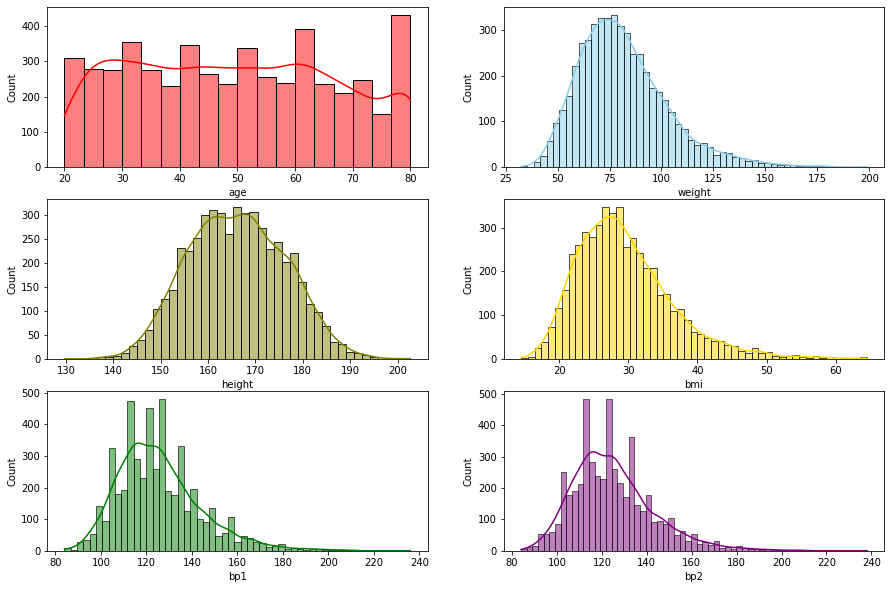

In [20]:
# Create histogram for numerical variable
fig, axs = plt.subplots(3,2, figsize=(15, 10))
      
sns.histplot(data= df_refined, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= df_refined, x='weight', kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= df_refined, x='height', kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= df_refined, x='bmi', kde=True, color="gold", ax=axs[1,1])
sns.histplot(data= df_refined, x='bp1', kde=True, color="green", ax=axs[2,0])
sns.histplot(data= df_refined, x='bp2', kde=True, color="purple", ax=axs[2,1])
plt.show()

### Observations of histograms
Well, we can see here that height has a normal distribution curve while weight and bmi have a right-skewed distribution

/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='bp2'>

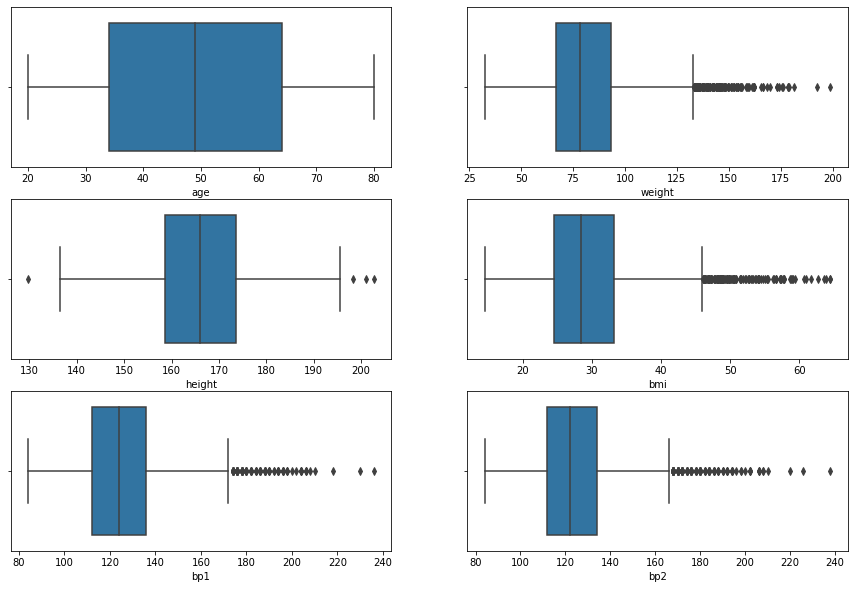

In [21]:
# Create boxplot to observe distribution of numerical value
fig, axs = plt.subplots(3,2, figsize=(15,10))
sns.boxplot(df_refined['age'], ax = axs[0,0])
sns.boxplot(df_refined['weight'], ax = axs[0,1])
sns.boxplot(df_refined['height'], ax = axs[1,0])
sns.boxplot(df_refined['bmi'], ax = axs[1,1])
sns.boxplot(df_refined['bp1'], ax = axs[2,0])
sns.boxplot(df_refined['bp2'], ax = axs[2,1])

### Obervations of boxplots
According to the boxplots, age variable has no outliers. Height has normal distribution with few outliers. Meanwhile, weight and bmi have more outliers in the upper values.

Based on the observation of histogram and boxplot, I decided the outliers to be outside of minimum and maximum value for height. Meanwhile for weight, BMI, and both blood pressures, I will consider value more than maximum as outliers.

In [22]:
# Height
qh25, qh50, qh75 = np.percentile(df_refined['height'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
df_refined = df_refined[(df_refined['height'] > minh) & (df_refined['height'] < maxh)]

In [23]:
# Weight
qw25, qw50, qw75 = np.percentile(df_refined['weight'], [25,50,75])
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
df_refined = df_refined[df_refined['weight'] < maxw]

In [24]:
# BMI
qb25, qb50, qb75 = np.percentile(df_refined['bmi'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
df_refined = df_refined[df_refined['bmi'] < maxb]

In [25]:
# Blood pressure 1
qb25, qb50, qb75 = np.percentile(df_refined['bp1'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
df_refined = df_refined[df_refined['bp1'] < maxb]

In [26]:
# Blood pressure 2
qb25, qb50, qb75 = np.percentile(df_refined['bp2'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
df_refined = df_refined[df_refined['bp2'] < maxb]

In [27]:
# Look at the data after removing outliers
df_refined.shape

(4791, 9)

### Now let's check out the histograms and boxplots after removing the outliers

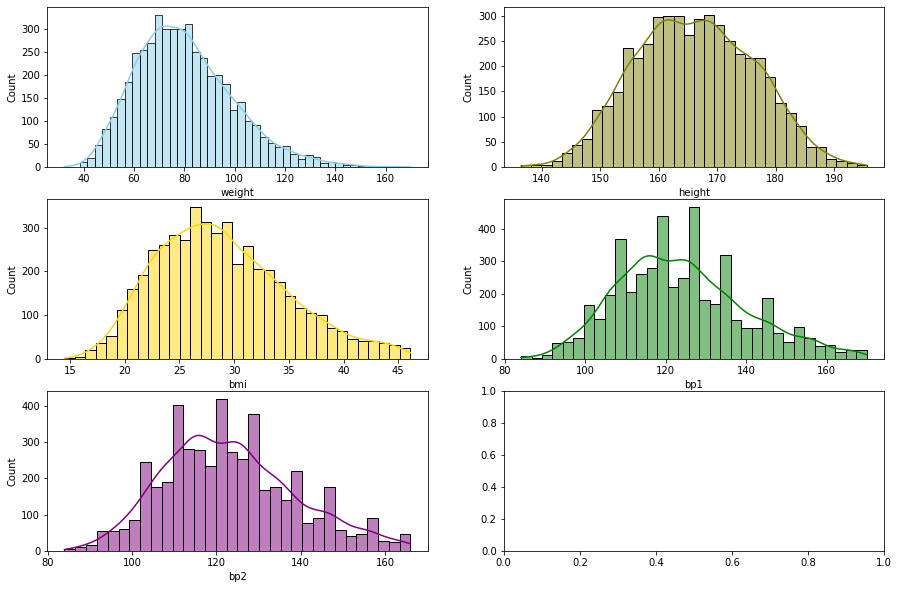

In [28]:
# Check the distribution after removing outliers using histogram
fig, axs = plt.subplots(3,2, figsize=(15, 10))
      
sns.histplot(data= df_refined, x="weight", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data= df_refined, x="height", kde=True, color="olive", ax=axs[0,1])
sns.histplot(data= df_refined, x="bmi", kde=True, color="gold", ax=axs[1,0])
sns.histplot(data= df_refined, x='bp1', kde=True, color="green", ax=axs[1,1])
sns.histplot(data= df_refined, x='bp2', kde=True, color="purple", ax=axs[2,0])

plt.show()


/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


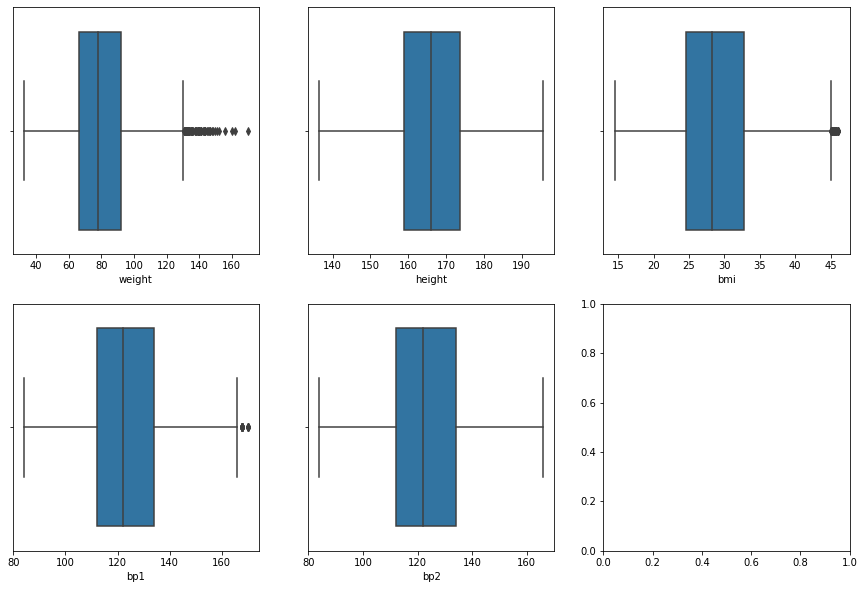

In [29]:
# Check distribution using boxplot after removing outliers

fig, axs = plt.subplots(2,3, figsize=(15, 10))

sns.boxplot(df_refined['weight'], ax = axs[0,0])
sns.boxplot(df_refined['height'], ax = axs[0,1])
sns.boxplot(df_refined['bmi'], ax = axs[0,2])
sns.boxplot(df_refined['bp1'], ax = axs[1,0])
sns.boxplot(df_refined['bp2'], ax = axs[1,1])

plt.show()

### Hooray! We finally have data with a normal distribution

In [30]:
#Data encoding for our categorical data (increase readability)
# smoking
df_refined['smoking'] = df_refined['smoking'].replace({1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan})

#gender
df_refined['gender'] = df_refined.gender.replace({1 : 'male', 2 : 'female'})

#education
df_refined['education'] = df_refined.education.replace({1 : '<9th grade', 2 : '9-11th grade',
                                           3 : 'HS or GED', 4 : 'Some college / AA',
                                           5 : 'College or above', 7 : 'Other',
                                           8 : 'Other'})

In [31]:
df_refined.head()

,smoking,gender,age,education,weight,height,bmi,bp1,bp2
0,yes,male,62,College or above,94.8,184.5,27.8,128.0,124.0
1,yes,male,53,HS or GED,90.4,171.4,30.8,146.0,140.0
2,yes,male,78,HS or GED,83.4,170.1,28.8,138.0,132.0
3,no,female,56,College or above,109.8,160.9,42.4,132.0,134.0
4,no,female,42,Some college / AA,55.2,164.9,20.3,100.0,114.0


# 2. Hypothesis Testing
This is not all inclusive with the rest of the project, this is just basic hypothesis testing. Using Wasserman's "All of Statistics" chapter 10, we can define hypothesis testing as:

We know that the basis of our testing has two attributes:

**Null Hypothesis: $H_0$**

**Alternative Hypothesis: $H_1$**

The tests we will conduct are:

* One Population Proportion
* Two Population Proportion
* Comparing Means (and their se)
* Paired Tests
* Goodness-of-Fit Test
* Log-Likelihood Test

The equation (also known as the wald test) is:

$$\frac{Best\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}$$ 

## 2.1. Hypothesis tests for one proportion
This is the most basic hypothesis test, and is rarely used in practice because it is rare that there is a specific fixed value to use for comparision. 

The test involves having a specified particular value as the null $H_0$ for the proportion, and we wish to asses if the data are compatible with this true parameter being equal to the specified $H_0$. 

The test case chosen for this test is a situation where the rate of lifetime smoking in another country was known to be 40%, and we wished to assess whether the rate of lifetime smoking in the US is different from 40%. We carry out the (two-sided) one-sample test that the population proportion of smokers is 0.4, and obtain a test statistic of 2.86 and a p-value of 0.004. This indicates that the NHANES data are compatible with the proportion of (ever) smokers in the US being 40%

This test was carried out in two ways, the first was finding the test statistic by hand, and the second was using the python library stasmodels. Both methods yielded the same result, which helps show that the method conducted by hand was correct. 

In [32]:
import statsmodels.api as sm
import scipy.stats.distributions as dist

x = df_refined.smoking.dropna() == "yes"
p = x.mean()
se = np.sqrt(0.4 * 0.6 / len(x))
test_stat = (p - 0.4) / se
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
print(test_stat, pvalue)

2.857061217634335 0.004275833625560986


The cell below uses a common library called statsmodels to conduct the analysis. We can see it achieves similar resuts to use doing it by hand, which helps us check if we were correct!

In [33]:
# Prints test statistic, p-value
print(sm.stats.proportions_ztest(x.sum(), len(x), 0.4)) # Normal approximation with estimated proportion in SE
print(sm.stats.proportions_ztest(x.sum(), len(x), 0.4, prop_var=0.4)) # Normal approximation with null proportion in SE

# Prints the p-value
print(sm.stats.binom_test(x.sum(), len(x), 0.4)) # Exact binomial p-value

(2.8356497305919985, 0.004573257227279512)
(2.857061217634335, 0.004275833625560986)
0.0043938428214933874


## 2.2 Hypothesis tests for two proportions
Comparative tests are used more frequently than tests comparing one population to a fixed value. A two-sample test of proportions is used to assess whether the proportion of individuals with some trait differs between two sub-populations. For example, I chose to compare the smoking rates between females and males. Since smoking rates vary strongly with age, we do this in the subpopulation of people between 18 and 25 years of age.

This was calculated in two ways, one by hand and one using statsmodels. We find that men are about 8% more likely to smoke than women between the ages of 18 to 25 (given that 26% of women between 18-25 smoke and 33% of men between 18-25 smoke according to the sample population in the NHANES dataset), and it's statistically significant because the p-value is around 0.005.

In [34]:
dx = df_refined[["smoking", "gender", "age"]].dropna()  # Drop missing values
dx = dx.loc[(dx.age >= 18) & (dx.age<= 25), :] # Restrict to people between 20 and 25 years old

# Summarize the data by caclculating the proportion of yes responses and the sample size
p = dx.groupby("gender")["smoking"].agg([lambda z: np.mean(z=="yes"), "size"])
p.columns = ["Smoke", "N"]
print(p)

# The pooled rate of yes responses, and the standard error of the estimated difference of proportions
p_comb = (dx.smoking == "yes").mean()
va = p_comb * (1 - p_comb)
se = np.sqrt(va * (1 / p.N.female + 1 / p.N.male))

# Calculate the test statistic and its p-value
test_stat = (p.Smoke.female - p.Smoke.male) / se
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
print(test_stat, pvalue)

           Smoke    N
gender               
female  0.255144  243
male    0.337719  228
-1.963606900779939 0.04957569651502259


In [35]:
dx_females = dx.loc[dx.gender=="female", "smoking"].replace({"yes": 1, "no": 0})
dx_males = dx.loc[dx.gender=="male", "smoking"].replace({"yes": 1, "no": 0})
sm.stats.ttest_ind(dx_females, dx_males) # prints test statistic, p-value, degrees of freedom

(-1.9675032944334307, 0.049714090364405154, 469.0)

## 2.3 Hypothesis tests comparing means

Example 10.8 of Wasserman has a great theoretical intro to this test. But, allow me to attempt to describe it. Tests of means have many similarities to tests of proportions. Just as with proportions, for comparing means there are one and two-sample tests, z-tests and t-tests, and one-sided and two-sided tests.

Similar to the tests of proportions, one-sample tests of means are not very common, but we will do an example of it anyway for a better understanding of our data. We compare systolic blood pressure to the fixed value of 120 (which is the lower threshold for "pre-hypertension") and find that the mean is significantly different from 120 (the point estimate of the mean is 124.6 so we will say 125).

In [36]:
dx = df_refined[["bp1", "age", "gender"]].dropna()
dx = dx.loc[(dx.age >= 40) & (dx.age <= 50) & (dx.gender == "male"), :]
print(dx.bp1.mean()) # prints mean blood pressure
sm.stats.ztest(dx.bp1, value=120)  # prints test statistic, p-value

124.62344139650872


(6.413092203362137, 1.4259721465373476e-10)

A formal test of the $H_0$ was also run to see if the mean blood pressure of women between 60 - 70 is equal to the mean blood pressure of men of the same age range. The results show that the mean systolic blood pressure is slightly higher in men than in women (131 mm/Hg vs 130 mm/Hg), but that the difference is not statistically significant (the p-value is 0.16).

In [145]:
dx = df_refined[["bp1", "age", "gender"]].dropna()
dx = dx.loc[(dx.age >= 60) & (dx.age <= 70), :]
bpx_female = dx.loc[dx.gender=="female", "bp1"]
bpx_male = dx.loc[dx.gender=="male", "bp1"]
print(bpx_female.mean(), bpx_male.mean()) # prints female mean, male mean
print(sm.stats.ttest_ind(bpx_female, bpx_male)) # prints test statistic, p-value, degrees of freedom

129.77033492822966 131.28805620608898
(-1.4042019621697406, 0.16062702348939215, 843.0)


While in this part of hypothesis testing, it is important to discuss the standard error. How can we estimate the standard error of the mean difference? Well, it can be done in a few ways. One way is by using the statsmodels library, which uses the "pooled" and "unequal" approaches of estimating the variance. If the variances are equal, then there should be little difference between the two approaches. However, even with a moderate difference, the results for the two methods are typically similar. 

I tested the 10-year age band between the BMI data and allow the statsmodel library to assess the evidence for any difference in BMI for men and women. The results are then printed per 10-year band. 

In [38]:
dx = df_refined[["bmi", "age", "gender"]].dropna()
dx["agegrp"] = pd.cut(df_refined.age, [18, 30, 40, 50, 60, 70, 80])
dx.groupby(["agegrp", "gender"])["bmi"].agg(np.std).unstack()
for k, v in dx.groupby("agegrp"):
    bmi_female = v.loc[v.gender=="female", "bmi"].dropna()
    bmi_female = sm.stats.DescrStatsW(bmi_female)
    bmi_male = v.loc[v.gender=="male", "bmi"].dropna()
    bmi_male = sm.stats.DescrStatsW(bmi_male)
    print(k)
    print("pooled: ", sm.stats.CompareMeans(bmi_female, bmi_male).ztest_ind(usevar='pooled'))
    print("unequal:", sm.stats.CompareMeans(bmi_female, bmi_male).ztest_ind(usevar='unequal'))
    print()

(18, 30]
pooled:  (1.0017886221345094, 0.3164456935802199)
unequal: (1.0122353553681755, 0.31142553532117845)

(30, 40]
pooled:  (0.9187850562544776, 0.35820801034676686)
unequal: (0.9162500283509661, 0.35953577129909386)

(40, 50]
pooled:  (2.1982214733482652, 0.02793332716600004)
unequal: (2.2365741257435063, 0.025314187579225614)

(50, 60]
pooled:  (1.5520439922611124, 0.12065169773596994)
unequal: (1.5534374923624668, 0.12031865168395503)

(60, 70]
pooled:  (2.7610542104653644, 0.005761511215181608)
unequal: (2.751825627904846, 0.005926406773513805)

(70, 80]
pooled:  (2.480691869267047, 0.01311276708669278)
unequal: (2.4788573018563804, 0.013180402543941755)



## 2.4 Hypothesis tests Paired tests

A common situation in research is to measure the same quantity multiple times on each unit of analysis. 

This test took advantage of how our dataset has two measurements of a subject's blood pressure. Even though the measurements are repeated, there is no guarantee that the mean is the same each time, i.e. the mean blood pressure may be slightly lower on the second measurement compared to the first. A paired test is a modified form of a mean test that can be used when we are comparing two repeated measurements on the same unit. 

A paired t-test for means is equivalent to taking the difference between the first and second measurements and using a one-sample test to compare the mean of these differences to zero. I did a paired test of the entire NHANES dataset, the first measurement of systolic blood pressure is on average 0.68 mm/Hg greater than the second measurement. While this difference is not large, it is strongly statistically significant. That is, there is strong evidence that the mean values for the first and second blood pressure measurements differ.

In [39]:
dx = df_refined[["bp1", "bp2"]].dropna()
db = dx.bp1 - dx.bp2
print(db.mean())
sm.stats.ztest(db)

0.6829471926528908


(9.393974717767955, 5.777777798822445e-21)

Now this is interesting! We can disect this further by dividing the population into 10 year wide age bands and also differentiating by gender, then carry out the paired t-test within each of the resulting 12 strata.  We see that the second systolic blood pressure measurement is always lower on average than the first.  The difference is larger for older people and for males.  The difference is statistically significant for females over 30, and for males over 60.   

Conducting many hypothesis tests and "cherry picking" the interesting results is typically a bad practice. I'm doing it here to show the different results for data exploration and familiarization, and understand that the strongest differences could be over-stated. However,there is a clear and consistent trend with age -- older people tend to have greater differences between their first and second blood pressure measurements than younger people.  There is also a difference between the genders, with older men having a stronger difference between the first and second blood pressure measurements than older women.  The gender difference for younger peple is not as clear. 

In [40]:
dx = df_refined[["gender", "bp1", "bp2", "age"]].dropna()
dx["agegrp"] = pd.cut(dx.age, [18, 30, 40, 50, 60, 70, 80])
for k, g in dx.groupby(["gender", "agegrp"]):
    db = g.bp1 - g.bp2
    # print stratum definition, mean difference, sample size, test statistic, p-value
    print(k, db.mean(), db.size, sm.stats.ztest(db.values, value=0))

('female', Interval(18, 30, closed='right')) 0.11623246492985972 499 (0.5939316363729968, 0.5525578382793322)
('female', Interval(30, 40, closed='right')) 0.7142857142857143 406 (3.4547779128647917, 0.000550746281454593)
('female', Interval(40, 50, closed='right')) 0.4841628959276018 442 (2.036953705064292, 0.04165468149333252)
('female', Interval(50, 60, closed='right')) 0.6813725490196079 408 (2.6990825725236776, 0.006953092208572771)
('female', Interval(60, 70, closed='right')) 0.9016393442622951 366 (3.035485440842931, 0.00240148817521389)
('female', Interval(70, 80, closed='right')) 1.535294117647059 340 (5.0677744621719025, 4.0249390504748983e-07)
('male', Interval(18, 30, closed='right')) 0.06526806526806526 429 (0.30635151141393274, 0.7593370228429778)
('male', Interval(30, 40, closed='right')) 0.45083932853717024 417 (1.8736976792876079, 0.06097210598683451)
('male', Interval(40, 50, closed='right')) 0.17174515235457063 361 (0.6707104783225233, 0.5024049863542785)
('male', Int

## 2.5 Hypothesis tests Goodness-of-Fit Test

One of the traditional statistical approaches, the Goodness-of-Fit test gives a solution to validate our theoretical assumptions about data distributions. 

For this test, I wanted to verify that our height variable follows a normal distribution. We find that it is actually not a normal distribution! Despite our best efforts to make it one earlier. This is shown because our chi-square value is 11.1, which is far too high to allow us to accept the normal distribution as this variable's actual distribution. 

<AxesSubplot:xlabel='height', ylabel='Count'>

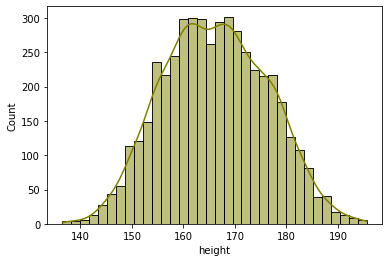

In [41]:
dx = df_refined[["height"]].dropna()
sns.histplot(data= dx, x="height", kde=True, color="olive")

In [42]:
np.average(list(dx.height.values))
#len(list(dx.height.values))
len(set(list(dx.height.values)))

498

In [43]:
# mean and standard deviation of given data
mean = np.mean(dx['height'])
std = np.std(dx['height'])

bins = 498 # 498 unique height measurements 
interval = []
for i in range(1,9):
  val = stats.norm.ppf(i/bins, mean, std)
  interval.append(val)
interval

[137.24613920856387,
 139.5235689679189,
 140.9331029970059,
 141.97300826179432,
 142.80480059918975,
 143.50213058213419,
 144.10501937295194,
 144.6377284900961]

In [44]:
interval.insert(0, -np.inf)
interval

[-inf,
 137.24613920856387,
 139.5235689679189,
 140.9331029970059,
 141.97300826179432,
 142.80480059918975,
 143.50213058213419,
 144.10501937295194,
 144.6377284900961]

In [45]:
dx = pd.DataFrame({'lower_limit':interval[:-1], 'upper_limit':interval[1:]})
dx

,lower_limit,upper_limit
0,-inf,137.246139
1,137.246139,139.523569
2,139.523569,140.933103
3,140.933103,141.973008
4,141.973008,142.804801
5,142.804801,143.502131
6,143.502131,144.105019
7,144.105019,144.637728


In [46]:
height_values = list(sorted(df_refined['height']))
dx['obs_freq'] = dx.apply(lambda x:sum([i>x['lower_limit'] and i<=x['upper_limit'] for i in height_values]), axis=1)
dx['exp_freq'] = 6
dx

,lower_limit,upper_limit,obs_freq,exp_freq
0,-inf,137.246139,1,6
1,137.246139,139.523569,5,6
2,139.523569,140.933103,6,6
3,140.933103,141.973008,2,6
4,141.973008,142.804801,3,6
5,142.804801,143.502131,9,6
6,143.502131,144.105019,6,6
7,144.105019,144.637728,11,6


In [47]:
stats.chisquare(dx['obs_freq'], dx['exp_freq'])

Power_divergenceResult(statistic=14.166666666666668, pvalue=0.04829519501386627)

In [48]:
p = 2    # number of parameters
DOF = len(dx['obs_freq']) - p -1
stats.chi2.ppf(0.95, DOF)

11.070497693516351

## 2.6 Hypothesis tests Likelihood Ratio Test

A likelihood ratio test compares the goodness of fit of two nested regression models. A nested model is simply one that contains a subset of the predictor variables in the overall regression model

Here we try to see which of the two models defined below could better predict a person's weight. The first model includes the age, BMI, bp1, and bp2 of the subject, while the nested model only includes the age and BMI. After conducting the analysis, the Chi-Squared test statistic is 39.3 and our p-value is $2.9*10^-9$, so we will reject the null hypothesis and this shows that the model includes age, BMI, bp1, and bp2 offered a significant fit in predicting a subject's weight.

In [49]:
#step 1, fit the regression models

#define response variable
y1 = df_refined['weight']

#define predictor variables
x1 = df_refined[['age', 'bmi', 'bp1', 'bp2']]

#add constant to predictor variables
x1 = sm.add_constant(x1)

#fit regression model
full_model = sm.OLS(y1, x1).fit()

#calculate log-likelihood of model
full_ll = full_model.llf

print(full_ll)

-17759.236776609887


In [50]:
#fit the reduced model, calculate the log likelihood
#define response variable
y2 = df_refined['weight']

#define predictor variables
x2 = df_refined[['age', 'bmi']]

#add constant to predictor variables
x2 = sm.add_constant(x2)

#fit regression model
reduced_model = sm.OLS(y2, x2).fit()

#calculate log-likelihood of model
reduced_ll = reduced_model.llf

print(reduced_ll)

-17778.887048000222


In [51]:
#Step 2, the log-likelihood test
#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(reduced_ll-full_ll)

print(LR_statistic)

#calculate p-value of test statistic using 2 degrees of freedom
p_val = scipy.stats.chi2.sf(LR_statistic, 2)

print(p_val)

39.300542780671094
2.924122531978343e-09


# 3. Partial Least Squares Path Modeling

PLSPM (partial least squares path modeling) is a correlation-based structural equation modeling (SEM) algorithm. It allows for estimation of complex cause-effect or prediction models using latent/manifest variables.

We will be using the PLSPM module, which is adapted into Python from the R module of the same name. 

https://fbertran.github.io/plsdof/reference/pls.ic.html

## I couldn't get this to work, sadly...If you can, please let me know! 

In [70]:
import pandas as pd, plspm.config as c
from plspm.plspm import Plspm
from plspm.scheme import Scheme
from plspm.mode import Mode
from plspm.bootstrap import Bootstrap
import pandas.testing as tm


In [74]:
df_refined #shows us what data we have to work with
df.to_csv(r'/Users/jackmoody/Desktop/JHU_Summer_2022/625.725/625.725_Project/NHANES_refined.csv', index = False)

In [72]:
data_set = "/Users/jackmoody/Desktop/JHU_Summer_2022/625.725/625.725_Project/nhanes_2015_2016.csv"
innerModelSaya = c.Structure()
innerModelSaya.addPath(["SMO_AGE", "EDU"], ["BODY_COMP"])
#config = c.Config(structure.path(), default_scale=Scale.NUM)
#config.add_lv("SMO_AGE", Mode.A, c.MV("smoking"), c.MV("age"), c.MV("gender"))
#config.add_lv("EDU", Mode.A, c.MV("smoking"), c.MV("education"))
#config.add_lv("BODY_COMP", Mode.A, c.MV("weight"), c.MV("bmi"), c.MV("bp1"), c.MV("bp2"))

#plspm_calc = Plspm(russa, config, Scheme.CENTROID, 100, 0.0000001)

#print(plspm_calc.inner_summary())
#print(plspm_calc.effects())

AttributeError: 'Structure' object has no attribute 'addPath'

## 3.1 Partial Least Squares Regular Implimentation

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [191]:
df_refined.head()

,smoking,gender,age,education,weight,height,bmi,bp1,bp2
0,yes,male,62,College or above,94.8,184.5,27.8,128.0,124.0
1,yes,male,53,HS or GED,90.4,171.4,30.8,146.0,140.0
2,yes,male,78,HS or GED,83.4,170.1,28.8,138.0,132.0
3,no,female,56,College or above,109.8,160.9,42.4,132.0,134.0
4,no,female,42,Some college / AA,55.2,164.9,20.3,100.0,114.0


/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:83: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:291: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:300: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/mode

Text(0.5, 1.0, 'age')

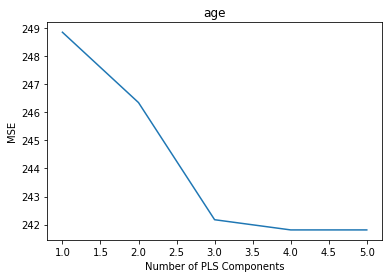

In [199]:
#define predictor and response variables
X = df_refined[["bmi", "weight", "bp1", "bp2"]]
y = df_refined[["age"]]

#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('age')

In [194]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

15.505652293656905

/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:83: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:291: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:300: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/mode

Text(0.5, 1.0, 'weight')

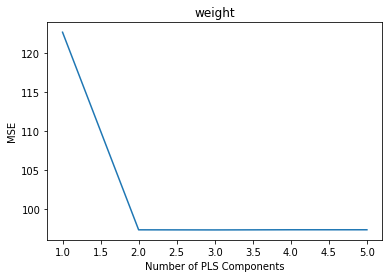

In [198]:
#define predictor and response variables
X = df_refined[["age", "bmi", "bp1", "bp2"]]
y = df_refined[["weight"]]

#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('weight')

In [197]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

10.014851966097508

/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:83: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:291: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:300: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jackmoody/opt/anaconda3/lib/python3.8/site-packages/sklearn/mode

Text(0.5, 1.0, 'bmi')

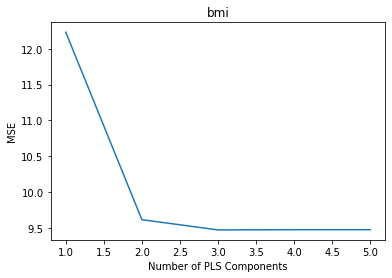

In [200]:
#define predictor and response variables
X = df_refined[["age", "weight", "bp1", "bp2"]]
y = df_refined[["bmi"]]

#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('bmi')

In [201]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

3.061985070586141

# 4.  K-fold cross-validation for model selection

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

I first wanted to see if age and weight were a good predictor of bmi, which is since the RMSE (root mean square error) is 1.57. I then wanted to see if age and BMI would be a good predictor of blood pressure, which it wasn't because its RMSE is 3.34. After that, I wanted to see if either age or BMI along with blood pressure 1 would be a better predictor of blood pressure 2, but they both come out at the same RMSE of 1.94, which is still pretty good. 

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [128]:
#We’ll then fit a multiple linear regression model to the dataset and perform LOOCV to 
#evaluate the model performance

#define predictor and response variables
X = df_refined[['age', 'weight']]
y = df_refined['bmi']

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print(mean(absolute(scores)))
#view sqrt mean absolute error
print(sqrt(mean(absolute(scores))))

2.4615991633853405
1.5689484259800703


In [129]:
#define predictor and response variables
X = df_refined[['age', 'bmi']]
y = df_refined['bp1']

#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print(mean(absolute(scores)))
#view sqrt mean absolute error
print(sqrt(mean(absolute(scores))))

11.134300550199447
3.336809936181479


In [164]:
#define predictor and response variables
X = df_refined[['bp1', 'bmi']]
y = df_refined['bp2']

#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print(mean(absolute(scores)))
#view sqrt mean absolute error
print(sqrt(mean(absolute(scores))))

3.7441977300594855
1.9349929534909127


In [131]:
#define predictor and response variables
X = df_refined[['age', 'bp1']]
y = df_refined['bp2']

#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print(mean(absolute(scores)))
#view sqrt mean absolute error
print(sqrt(mean(absolute(scores))))

3.75464989194178
1.9376918980946842
